In [97]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# np.random.rand() #give 1 number
# np.random.rand(10) #gives 10 number
np.random.rand(5 ,2) #give five numbers in sets of 2

#all numbers between 0 and 1, and are more or less evenly distributed to cover intervals in 0 to 1

array([[0.30046574, 0.66887454],
       [0.18816267, 0.12577383],
       [0.61924078, 0.97329659],
       [0.55957258, 0.37300655],
       [0.00097951, 0.75552435]])

In [6]:
n = 10000
random_numbers = np.random.rand(n)

In [7]:
# The numbers less than .5 must be about 50%
np.sum(random_numbers < .5) / n * 100

49.87

In [8]:
# The numbers less than .25 must be about 25%
np.sum(random_numbers < .25) / n * 100

25.259999999999998

In [9]:
# The numbers more than .75 must be about 25%
np.sum(random_numbers > .75) / n * 100

25.34

# Graphical test

Text(0, 0.5, 'Value of random number')

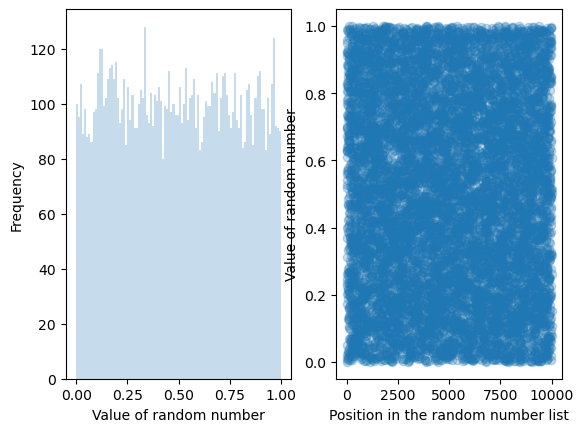

In [12]:
n = 10000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25) #x axis is random numbers, y is count
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25) #range n = 10000, and plotting it against the value that was generated in random_numbers
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

Text(0, 0.5, 'Value of random number')

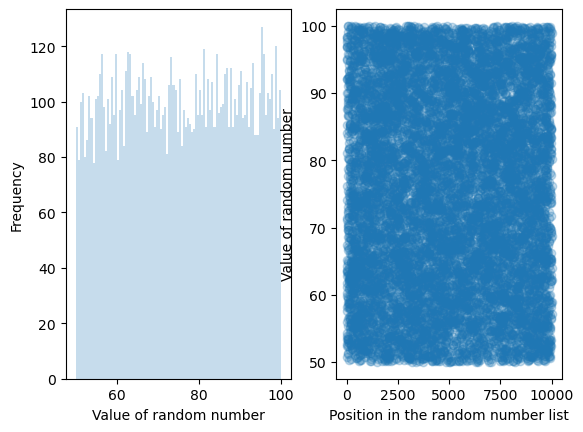

In [14]:
n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25) #x axis is random numbers, y is count
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25) #range n = 10000, and plotting it against the value that was generated in random_numbers
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

#follow a normal distribution within defined range

# Seeding a PRNG

In [26]:
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([42, 39, 63, 65, 93, 64, 27, 45, 76, 80])

In [27]:
np.random.randint(0, 100, 10)     # Another ten integers between 0 and 100

array([94, 57, 32, 63, 10, 76, 89, 71, 66, 67])

In [34]:
np.random.seed(1234)              # Specifying a seed
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([83, 57,  0, 50, 21, 77, 40, 33, 90, 62])

In [39]:
np.random.seed(1234)
np.random.randint(0, 100, 10)     # Same ten integers between 0 and 100

#think of it as minecraft seed, each has predetermined random numbers generated already

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

# Using random numbers

## Simulating Magic-8 ball

In [44]:
def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']

    return np.random.choice(options) #for randomised choosing of string in a list, all have equal chances

In [47]:
questions = ['Will I be pretty?',
             'Will I be rich?',
             'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')

Q: Will I be pretty?
A: Most likely.

Q: Will I be rich?
A: Yes definitely.

Q: Will I be in trouble?
A: Outlook good.



## Flipping coins

In [48]:
np.random.choice(['Head', 'Tails'])

'Tails'

In [49]:
#for 10 flips
no_of_coins = 10
np.random.choice(['Head', 'Tails'], no_of_coins)

array(['Head', 'Tails', 'Tails', 'Head', 'Tails', 'Head', 'Tails', 'Head',
       'Tails', 'Tails'], dtype='<U5')

In [50]:
def flip_coins(no_of_coins=1, probability=.5):
    '''
    Returns the number of values greater that 
    `probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads

In [52]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 49.00%


In [102]:
# Biased coin
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins, probability = .3) #probability to get tail = .3, so head = .7
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 65.30%


## Flipping experiment

In [112]:
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)] #flip 10 coins for 10000 times
no_of_heads, heads_counts = np.unique(result, return_counts=True) #returns unique values of heads in the list and count how many returns

In [104]:
heads_probability = heads_counts/no_of_repeats

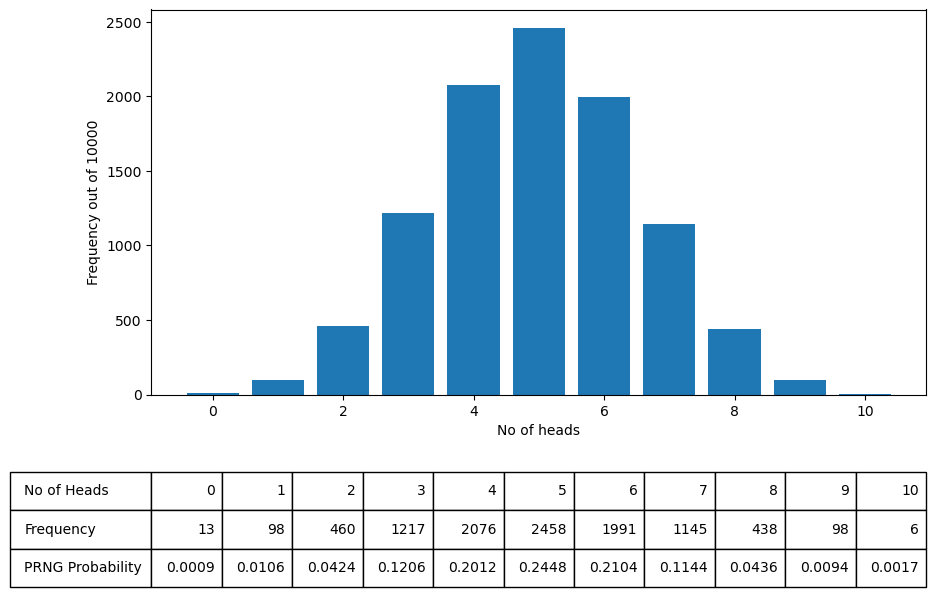

In [113]:
plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability], #creating a table inside plot
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3]) #size of the table, through trial and error

In [108]:
from scipy.stats import binom

In [109]:
binom.pmf(k=7, n=10, p=.5) #for discrete binomial distributions (heads, tails, no half etc.), use pmf (probability mass function/discrete density function)
#calculates the probability where out of 10 fair (p=.5) coin tosses, get 7 heads

0.11718749999999999

In [110]:
binomial_probabilities = binom.pmf(k=no_of_heads, n=10, p=.5)

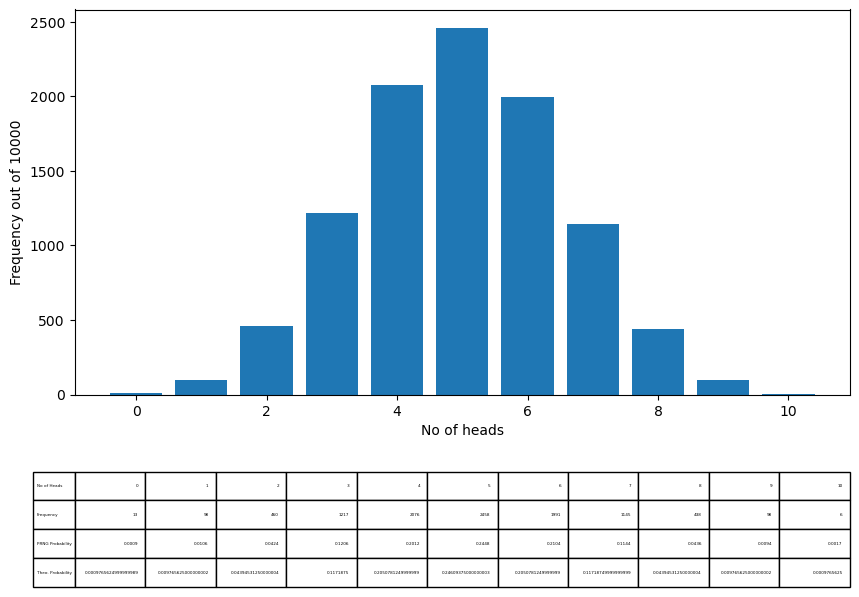

In [128]:
plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability, binomial_probabilities], #added binomial_probabilities
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability', 'Theo. Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])